In [9]:
import pandas as pd
# from plotnine import *
import matplotlib.pyplot as plt
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [41]:
def plot_SCI_sparkline(df, SCI, rolling_avg=None):
    '''plot a sparkline for an SCI
    
    
    '''
    daily_ts = doc_df[doc_df['SCI']==SCI].resample('D')['inmate_positive_D'].sum()
    
    if rolling_avg:
        daily_ts=daily_ts.rolling(rolling_avg).mean()
    
    start=daily_ts.index.min().strftime('%b %d')
    end=daily_ts.index.max().strftime('%b %d')
    
    xmax = daily_ts.idxmax()
    ymax = daily_ts.max()
    
    if rolling_avg:
        ymax_str = f'{ymax:0.1f}'
    else:
        ymax_str = str(round(ymax))

    
    fig,ax=plt.subplots(figsize=(4,0.4))
    sci_plot= daily_ts.plot(ax=ax)
    my_xticks = ax.get_xticks()
    
    #sci_plot.set_axis_off()
    sci_plot.set_frame_on(False)
    sci_plot.get_yaxis().set_visible(False)
    sci_plot.get_xaxis().set_visible(True)
    
    sci_plot.set_xticks([my_xticks[0], my_xticks[-1]])
    sci_plot.set_xticklabels([start, end])
    sci_plot.xaxis.set_ticks_position('none') 
    sci_plot.annotate(ymax_str, (xmax,ymax), color='red')
    
    sci_plot.axes.set_xlim(right=daily_ts.index.max()+timedelta(days=2))
    
    plt.savefig(f'../assets/img/table_rolling_cases_figs/{SCI}_rolling_avg.svg',bbox_inches="tight")

In [17]:
doc_df = pd.read_csv('../data/latest_data/PA_DOC_testing_data.csv', 
                     parse_dates=True,
                     index_col='date')

In [18]:
most_recent = doc_df.groupby('SCI').last()

most_recent['inmate_tests'] = most_recent['inmate_positive'] + most_recent['inmate_negative'] + most_recent['inmate_pending']
most_recent['inmate_current_cases'] = most_recent['inmate_positive'] - most_recent['inmate_recovered']
most_recent['inmate_current_pr'] = most_recent['inmate_positive_D'] / (most_recent['inmate_negative_D'] + most_recent['inmate_positive_D'])

most_recent = most_recent.reset_index()
most_recent = most_recent[['inmate_tests','inmate_current_cases','inmate_death','SCI']]
most_recent = most_recent.fillna(0)
most_recent[['inmate_tests','inmate_current_cases','inmate_death']] = most_recent[['inmate_tests','inmate_current_cases','inmate_death']].astype(int)

bottom_row = most_recent.iloc[:,:-1].sum(0)
bottom_row['SCI'] = "TOTAL"
most_recent = pd.concat([most_recent,pd.DataFrame(bottom_row).T])

most_recent['inmate_tests'] = most_recent['inmate_tests'].apply(lambda x:'{0:,d}'.format(x))
most_recent['inmate_current_cases'] = most_recent['inmate_current_cases'].apply(lambda x:'{0:,d}'.format(x))
most_recent['inmate_death'] = most_recent['inmate_death'].apply(lambda x:'{0:,d}'.format(x))

ValueError: NaTType does not support strftime

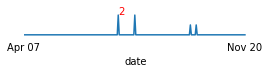

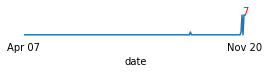

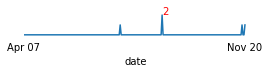

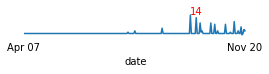

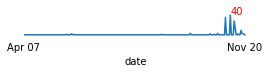

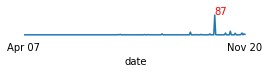

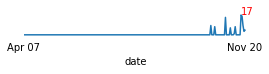

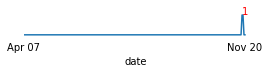

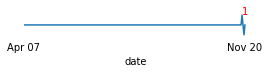

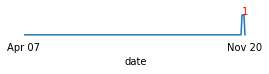

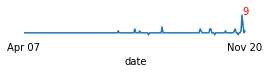

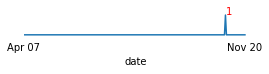

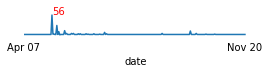

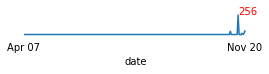

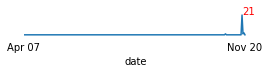

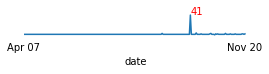

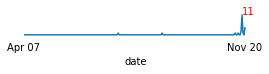

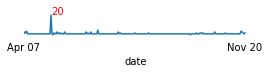

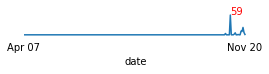

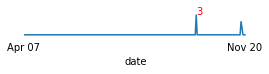

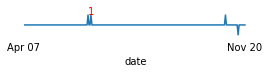

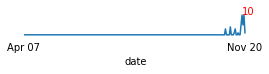

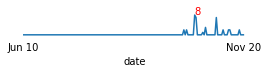

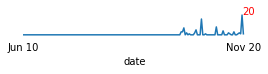

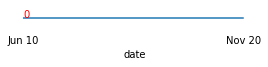

In [42]:
for sci in pd.unique(most_recent.SCI):
    plot_SCI_sparkline(doc_df,sci)

In [93]:

most_recent.to_csv('../_data/most_recent_inmateData.csv')